In [1]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        # Utilisez PdfReader à la place de PdfFileReader
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        # Utilisez len(reader.pages) au lieu de reader.numPages
        for page_num in range(len(pdf_reader.pages)):
            if page_num % 100 == 0:
                print(f'Page {page_num}')
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

In [2]:
code_educ = extract_text_from_pdf('code-de-léducation.pdf')

Page 0
Page 100
Page 200
Page 300
Page 400
Page 500
Page 600
Page 700
Page 800
Page 900
Page 1000
Page 1100
Page 1200
Page 1300
Page 1400
Page 1500


In [3]:
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

In [4]:
def text_to_corpus(text):
    sentences = sent_tokenize(text)
    corpus_token = [
    [word for word in simple_preprocess(sentence, deacc = True)] 
    for sentence in sentences
]
    return corpus_token

In [5]:
corpus_code = text_to_corpus(code_educ)

In [6]:
for i in range(len(corpus_code)):
    if 'redacton' in corpus_code[i]:
        print(i)
        print(corpus_code[i])

3719
['article', 'sont', 'applicables', 'dans', 'les', 'iles', 'wallis', 'et', 'futuna', 'les', 'articles', 'et', 'dans', 'leur', 'redacton', 'resultant', 'de', 'ordonnance', 'du', 'janvier', 'portant', 'extension', 'et', 'adaptation', 'dans', 'les', 'iles', 'wallis', 'et', 'futuna', 'en', 'polynesie', 'francaise', 'et', 'en', 'nouvelle', 'caledonie', 'de', 'la', 'loi', 'du', 'juillet', 'relative', 'enseignement', 'superieur', 'et', 'la', 'recherche', 'les', 'articles', 'et']


In [7]:
print(corpus_code[:1000])

[['code', 'de', 'education', 'derniere', 'modification', 'le', 'janvier', 'document', 'genere', 'le', 'janvier', 'copyright', 'legifrancecode', 'de', 'education', 'partie', 'legislative', 'premiere', 'partie', 'dispositions', 'generales', 'et', 'communes', 'livre', 'ier', 'principes', 'generaux', 'de', 'education', 'titre', 'ier', 'le', 'droit', 'education', 'chapitre', 'ier', 'dispositions', 'generales'], ['article', 'education', 'est', 'la', 'premiere', 'priorite', 'nationale'], ['le', 'service', 'public', 'de', 'education', 'est', 'concu', 'et', 'organise', 'en', 'fonction', 'des', 'eleves', 'et', 'des', 'etudiants'], ['il', 'contribue', 'egalite', 'des', 'chances', 'et', 'lutter', 'contre', 'les', 'inegalites', 'sociales', 'et', 'territoriales', 'en', 'matiere', 'de', 'reussite', 'scolaire', 'et', 'educative'], ['il', 'reconnait', 'que', 'tous', 'les', 'enfants', 'partagent', 'la', 'capacite', 'apprendre', 'et', 'de', 'progresser'], ['il', 'veille', 'la', 'scolarisation', 'inclusiv

In [8]:
from gensim.models import Word2Vec

In [9]:
#création du modèle
model5 = Word2Vec(window=5)
model5.build_vocab(corpus_code)

In [10]:
model5.train(corpus_code, total_examples=model5.corpus_count, epochs= 5)

(1829139, 2688335)

In [11]:
model5.wv.most_similar('loi')

[('ordonnance', 0.8745595216751099),
 ('juillet', 0.8576248288154602),
 ('aout', 0.854994535446167),
 ('resultant', 0.8547441363334656),
 ('er', 0.840796709060669),
 ('relative', 0.8337575793266296),
 ('modifie', 0.8325616121292114),
 ('septembre', 0.823537290096283),
 ('octobre', 0.8124500513076782),
 ('novembre', 0.7902632355690002)]

In [12]:
import networkx as nx
# Dessiner le graphe : facultatif, nécessite matplotlib
import matplotlib.pyplot as plt

In [13]:
# Créer un graphe non-dirigé avec NetworkX
Gr = nx.Graph()

In [14]:
def créer_reseau_récursif(model, word, G, niveau, max_niveau=2):
    if niveau > max_niveau:
        return
    
    # Ajouter le nœud actuel au graphe
    G.add_node(word)
    
    # Obtenir les mots similaires
    similar_words = model.wv.most_similar(word, topn=10)
    
    # Ajouter les nœuds et les arêtes pour chaque mot similaire
    for similar_word, similarity_score in similar_words:
        G.add_node(similar_word)
        G.add_edge(word, similar_word, weight=similarity_score)
        
        # Appeler récursivement pour les mots similaires
        créer_reseau_récursif(model, similar_word, G, niveau+1, max_niveau)


In [15]:
mot_initial = 'loi'

In [16]:
créer_reseau_récursif(model5, mot_initial, Gr, 0, 1)

In [17]:
def dessin_graphe2(G):
    # Utiliser une disposition fruchterman_reingold pour une meilleure répartition des nœuds
    pos = nx.spring_layout(G, k=0.15, iterations=50)
    
    # Dessiner les nœuds avec des paramètres pour améliorer la lisibilité
    nx.draw(G, pos, with_labels=False, node_size=30, node_color='skyblue')

     # Dessiner les arêtes avec une couleur plus claire et une transparence réduite
    nx.draw(G, pos, with_labels=False, edge_color='gray', alpha=1)
    
    # Dessiner les labels des nœuds de manière à éviter le chevauchement
    labels = nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_family='sans-serif', alpha=0.7)

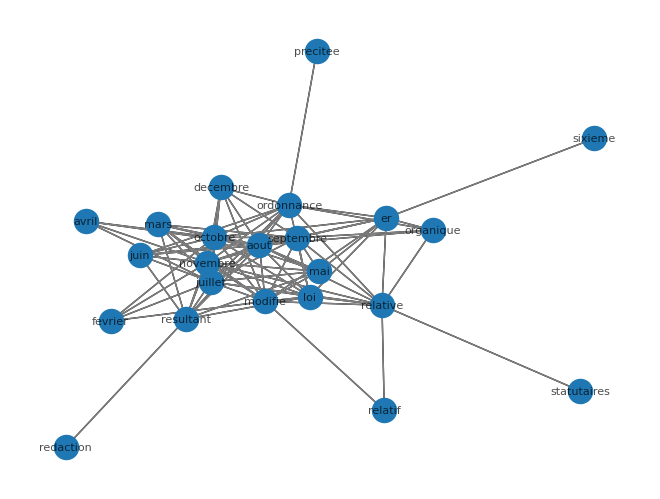

In [18]:
dessin_graphe2(Gr)

Maintenant, on veut comprendre les versets responsables des rapprochements de ce graphe. 

On vérifie si les fonctions inspirées du code ci-dessous et rassemblées dans le fichier python cluster_FUNCTION fonctionnent. 

In [25]:
from cluster2_FUNTION import extract_phrases_with_co_occurrences, kmedoids, reveal_cluster

In [20]:
# Supposons que vous ayez les 7 mots considérés
mots_consideres = ['resultant', 'redaction', 'loi', 'reglement', 'mars', 'ordonnance', 'juin']

In [21]:
phrases = extract_phrases_with_co_occurrences(code_educ, 'mars', 'loi')
phrases2 = extract_phrases_with_co_occurrences(code_educ, 'juin', 'loi')

In [22]:
print(phrases2)

["Code de l'éducation - Dernière modification le 01 janvier 2020 - Document généré le 06 janvier 2020\nCopyright (C) 2007-2020 LegifranceArticle L756-1\n \nLes établissements publics ou privés dispensant des formations sociales supérieures sont régis par les\ndispositions des articles 29 et 29-1 de la loi n° 75-535 du 30 juin 1975 relative aux institutions sociales et\nmédico-sociales", "221-24 du code du tourisme ;\n \n10° Huissier de justice : décret n° 75-770 du 14 août 1975 relatif aux conditions d'accès à la profession\nd'huissier de justice ainsi qu'aux modalités des créations, transferts et suppressions d'offices d'huissier de\njustice et concernant certains officiers ministériels et auxiliaires de justice ;\n \n11° Notaire : décret n° 73-609 du 5 juillet 1973 relatif à la formation professionnelle dans le notariat et aux\nconditions d'accès aux fonctions de notaire ;\n \n12° Œnologue : arrêté du 5 juin 2007 portant organisation des études en vue de l'obtention du diplôme\nnatio

In [23]:
phrases_tot = phrases + phrases2

In [24]:
clust, kmed, data = kmedoids(3, phrases_tot, model5)

c:\miniconda\envs\snake\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


In [27]:
reveal_cluster(clust, kmed, phrases_tot)

(array([1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1], dtype=int64),
 ["Article D312-48-1Code de l'éducation - Dernière modification le 01 janvier 2020 - Document généré le 06 janvier 2020\nCopyright (C) 2007-2020 LegifranceDans les lycées publics et privés sous contrat, d'enseignement général et technologique ou professionnel,\nles élèves bénéficient au cours de leur scolarité d'une information sur le service civique créé par la loi n°\n2010-241 du 10 mars 2010",
  "221-24 du code du tourisme ;\n \n10° Huissier de justice : décret n° 75-770 du 14 août 1975 relatif aux conditions d'accès à la profession\nd'huissier de justice ainsi qu'aux modalités des créations, transferts et suppressions d'offices d'huissier de\njustice et concernant certains officiers ministériels et auxiliaires de justice ;\n \n11° Notaire : décret n° 73-609 du 5 juillet 1973 relatif à la formation professionnelle dans le notariat et aux\nconditions d'accès aux fonctions de notaire ;\n \n12° Œnologue : arrêté du 5 juin 20

In [54]:
mots_2 = ['mars', 'loi']

In [19]:
from cluster_FUNCTION import passages_cooccurrence, afficher_passages_coocurrences, k_means, kmedoids, reveal_clusters_2, tri_reveal

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\viccs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Supposons que vous ayez les 7 mots considérés
mots_consideres = ['resultant', 'redaction', 'loi', 'reglement', 'mars', 'ordonnance', 'juin']

In [27]:
psg_cooc = passages_cooccurrence(code_educ, mots_consideres)

NameError: name 'passages_cooccurrence' is not defined

In [22]:
#afficher_passages_coocurrences(psg_cooc, mots_consideres, 5)

In [22]:
label = kmedoids(7, psg_cooc, model5)

In [24]:
print(label)

[4 5 0 ... 5 5 5]


In [25]:
label2 = k_means(7, psg_cooc, model5) 

Full batch converged at iteration 38/100 with center shifts = tensor([0.]).


In [26]:
print(label2)

[[6 6 6 ... 2 2 0]]


In [23]:
dico = reveal_clusters_2(label, psg_cooc, 7)

IndexError: tuple index out of range

In [25]:
new_list_0 = tri_reveal(dico[0])

In [26]:
print(new_list_0)

[{'wallis', 'resultant', 'du', 'present', 'iles', 'article', 'applicables', 'leur', 'dans', 'code', 'articles', 'futuna', 'redaction', 'sont', 'les', 'et'}]


Pour ce faire, on va se focus sur un noeud à chaque fois et extraire les versets où il y a occurence d'un ou plusieurs des termes concernés. On va ensuite faire du clustering pour comprendre mieux ce corpus particulier. 

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

In [ ]:
# Supposons que vous ayez les 7 mots considérés
mots_consideres = ['resultant', 'redaction', 'loi', 'reglement', 'mars', 'ordonnance', 'juin']

In [ ]:
def text_to_corpus_mots(text):
    list_mots = word_tokenize(text)
    list_mots_flat = []
    for word in list_mots:
        word_list = simple_preprocess(word, deacc=True)
        list_mots_flat.extend(word_list)
    return list_mots_flat

La fonction extend est une méthode des objets de type liste en Python. Elle est utilisée pour ajouter les éléments d'une autre liste (ou d'un autre iterable) à la fin de la liste à laquelle la méthode est appliquée. 

In [ ]:
# Tokenisation en mots
mots = text_to_corpus_mots(code_educ)

In [ ]:
print(mots[:100])

In [ ]:
'redacton' in mots

In [ ]:
# Recherche des passages avec co-occurrence d'au moins 2 mots parmi les 7 dans une fenêtre de 5 mots
fenetre_taille = 5
passages_cooccurrence = []

In [ ]:
for i in range(len(mots) - 2*fenetre_taille):
    mots_fenetre = mots[i:i+2*fenetre_taille]
    if len(set(mots_consideres).intersection(set(mots_fenetre))) >= 2:
        passages_cooccurrence.append(mots_fenetre)

In [ ]:
# Afficher les résultats
print(f"Passages avec co-occurrence d'au moins 2 mots parmi {mots_consideres} dans une fenêtre de {fenetre_taille} mots :")
for passage in passages_cooccurrence:
    print('')
    print(passage)

Maintenant, on veut clusteriser les phrases.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

In [ ]:
print(passages_cooccurrence[4])

In [ ]:
# Obtention des vecteurs de texte en moyennant les vecteurs de mots
def moyenne_vecteurs(mots, model):
    # Retourne le vecteur moyen pour une liste de mots
    vecteurs = [model.wv.get_vector(mot) for mot in mots if model.wv.has_index_for(mot)]
    return np.mean(vecteurs, axis=0)

In [ ]:
print(moyenne_vecteurs(passages_cooccurrence[5], model5))
print(moyenne_vecteurs(passages_cooccurrence[5], model5).shape)

In [ ]:
vecteur_texte = []
for passage in passages_cooccurrence:
    vecteur_texte.append(moyenne_vecteurs(passage, model5))

In [ ]:
print(len(vecteur_texte))
print(len(passages_cooccurrence))

Dans cette vidéo : https://www.youtube.com/watch?v=EItlUEPCIzM, une explication claire de la théorie du k-mean et sur la façon de choisir le k optimal. 

In [ ]:
import torch
from torch_kmeans import KMeans

In [ ]:
model = KMeans(n_clusters=4, BaseDistance='cosine')

x = torch.randn((4, 20, 2))   # (BS, N, D)
model = model.fit(x)
labels = model.predict(x)
print(labels)

In [ ]:
# matrice de données ATTENTION : chaque ligne représente un vecteur)
data_matrix = np.array(vecteur_texte)  # Remplacez cela par vos données
torch_tensor = torch.from_numpy(data_matrix)

In [ ]:
#on vérifie qu'on a bien nos vecteurs en ligne 
print(data_matrix.shape)
print(torch_tensor.shape)

Un torch.Tensor est un type de données multidimensionnel dans la bibliothèque PyTorch. C'est l'équivalent des tableaux Numpy, mais avec des fonctionnalités supplémentaires pour être utilisé efficacement sur des accélérateurs matériels tels que les GPU. Un tensor unidimensionnel est similaire à un vecteur, un tensor bidimensionnel est similaire à une matrice, et ainsi de suite.

In [ ]:
# Ajoutez une dimension supplémentaire pour la batch_size
batch_size_one_tensor = torch_tensor.unsqueeze(0)

# batch_size_one_tensor aura maintenant une batch_size de 1
print(batch_size_one_tensor.shape)

La batch_size dans le contexte de l'apprentissage en profondeur avec PyTorch fait référence au nombre d'échantillons de données inclus dans une seule itération lors de l'entraînement d'un réseau neuronal. Lorsque vous entraînez un modèle sur un ensemble de données, il est souvent inefficace de passer par chaque exemple un à un, car cela peut être très lent et nécessiter beaucoup de mémoire.

In [ ]:
model = KMeans(n_clusters=10, BaseDistance='cosine')

model = model.fit(batch_size_one_tensor)
labels = model.predict(batch_size_one_tensor)

In [ ]:
print(type(labels))

In [ ]:
# Convertissez le tensor en un tableau NumPy
labels_numpy = labels.numpy()

# Affichez les étiquettes attribuées aux exemples
print(labels_numpy)

In [ ]:
print(type(labels_numpy))

In [ ]:
print(labels_numpy.shape)

In [ ]:
print(len(labels_numpy[0]))

Maintenant que j'ai obtenu les clusterings, je veux retrouver les passages associés pour comprendre quels passages ont été regroupés ensemble. 

In [ ]:
indices_of_0 = np.where(labels_numpy == 0)[1]
indices_of_1 = np.where(labels_numpy == 1)[1]
indices_of_2 = np.where(labels_numpy == 2)[1]
indices_of_3 = np.where(labels_numpy == 3)[1]
indices_of_4 = np.where(labels_numpy == 4)[1]
indices_of_5 = np.where(labels_numpy == 5)[1]
indices_of_6 = np.where(labels_numpy == 6)[1]
indices_of_7 = np.where(labels_numpy == 7)[1]
indices_of_8 = np.where(labels_numpy == 8)[1]
indices_of_9 = np.where(labels_numpy == 9)[1]


In [27]:
print(indices_of_0)

NameError: name 'indices_of_0' is not defined

In [ ]:
for i in range(len(indices_of_4)):
    print(passages_cooccurrence[indices_of_4[i]])

On peut aussi utiliser cette fonction de sklearn pour faire l'algo KMedoids.